In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [80]:
df= pd.read_csv('hotel_bookings.csv')
df.shape

(119390, 32)

In [81]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.00,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.00,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.50,0,0,Canceled,2015-04-22


In [82]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [83]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [84]:
# we can simply fill the children colum with mean. 
df['children']= df.fillna(df['children'].mean())

In [85]:
# country can not be filled as null as the person may have come from any country
df['country']= df.fillna(df['country'].mode()[0])

In [86]:
# there is the possibility that there is no agent so we may fill it with null value
df['agent']= df.fillna('None')

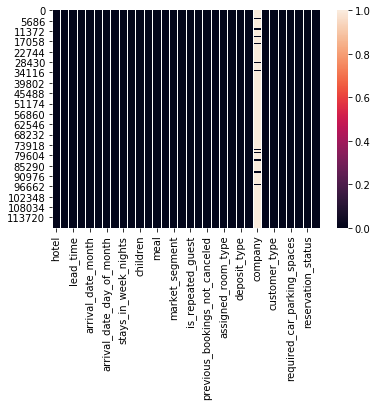

In [87]:
sns.heatmap(df.isnull())

In [89]:
df['company']= df.drop(['company'],axis=1)

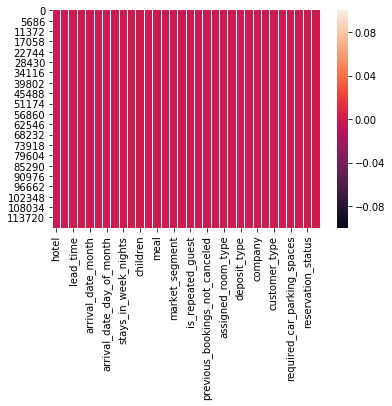

In [90]:
sns.heatmap(df.isnull())

In [12]:
#df['reservation_status_date']= df.drop(['reservation_status_date'],axis=1)

In [91]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,Resort Hotel,Resort Hotel,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,Resort Hotel,Resort Hotel,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,Resort Hotel,Resort Hotel,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,Resort Hotel,Resort Hotel,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,Resort Hotel,Resort Hotel,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Feature Selection

In [92]:
corrmat= df.corr()
corrmat

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.020915,-0.124410,0.086042,-0.073548,0.000149,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,-0.013192,0.010341,-0.119822,0.029218,0.030872,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.010395,-0.030131,0.035501,-0.020904,0.005508,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.018483,-0.087239,-0.012775,-0.042715,0.063281,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.020191,-0.097245,-0.013992,-0.048743,0.096209,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.008283,0.230641,0.014785,0.122884
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,1.000000,-0.008943,-0.007501,-0.006550,0.083440,-0.010621,0.029186,0.037383,0.097889
is_repeated_guest,-0.084793,-0.124410,0.010341,-0.030131,-0.006145,-0.087239,-0.097245,-0.146426,-0.008943,1.000000,0.082293,0.418056,0.012092,-0.022235,-0.134314,0.077090,0.013050


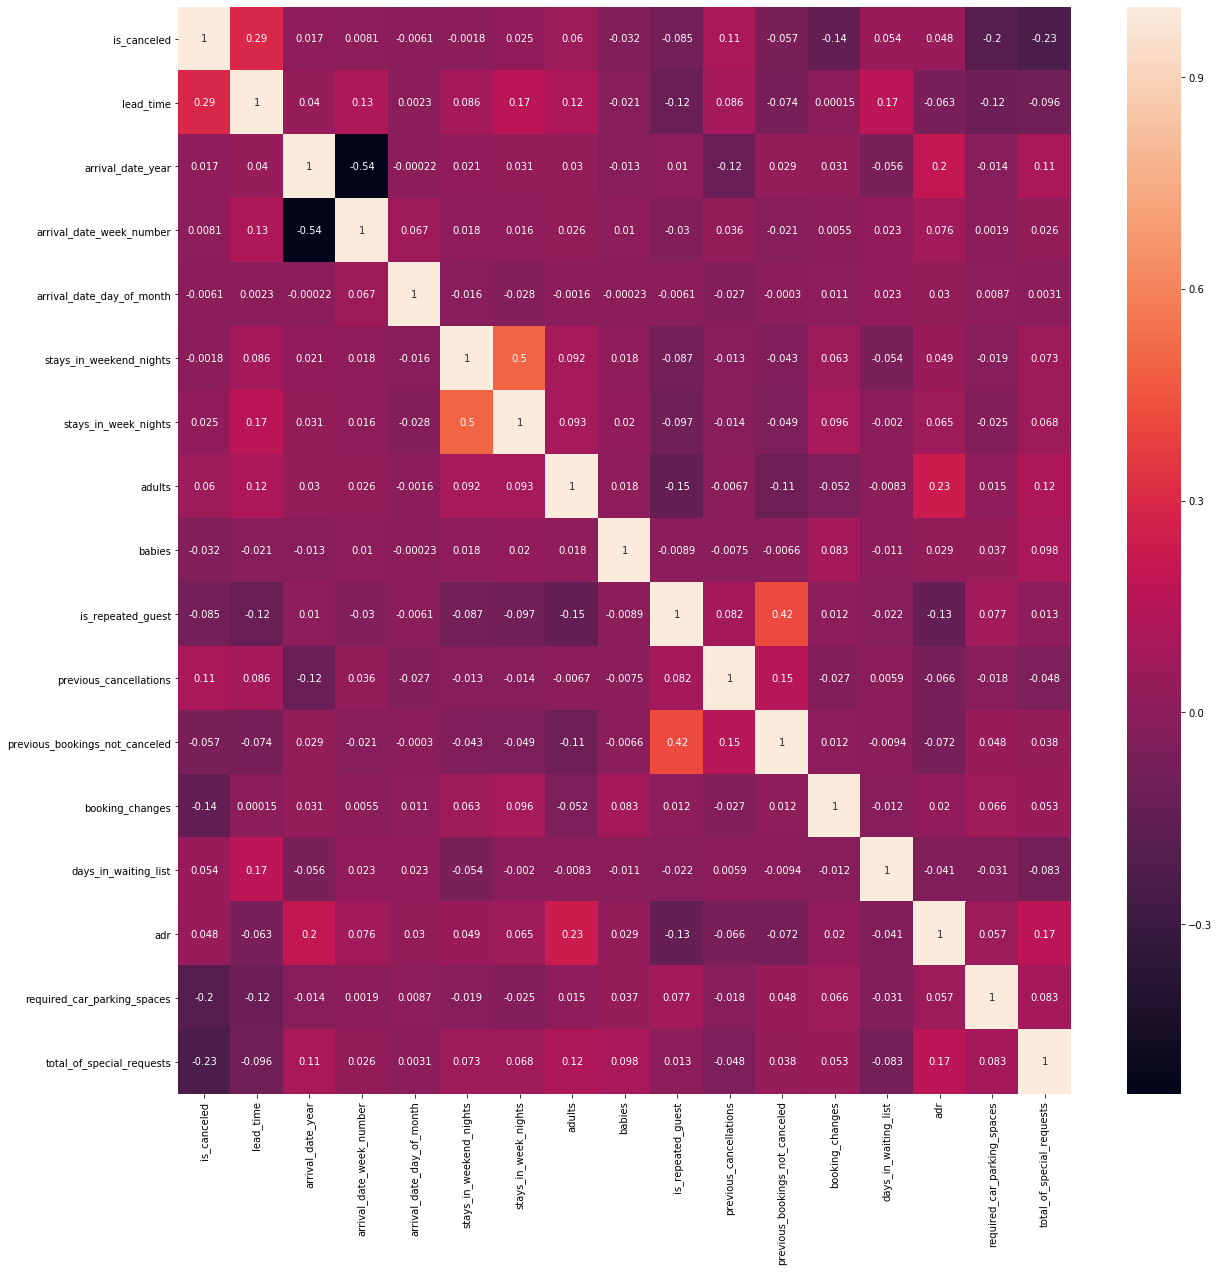

In [93]:
top_cor_feature= corrmat.index
plt.figure(figsize=(20,20))
graph= sns.heatmap(df[top_cor_feature].corr(),annot=True)

### This heat map shows us that arrival_date_number, arrival_date_of_month, stay_in_weekend_nights are having very less significance. Also city hotel and Resort hotel are invertionaly related. So i will drop arrival_date_time, arrival_date_of_month, stay_in_weekend_nights.

In [94]:
df.drop(['arrival_date_week_number'],inplace= True, axis= 1)

In [95]:
df.drop(['arrival_date_day_of_month'],inplace= True, axis=1)

In [96]:
df.drop(['stays_in_weekend_nights'],inplace= True, axis=1)

In [97]:
#df['hotel'].value_counts()

In [98]:
#hotel_type= pd.get_dummies(df['hotel'])
#df= pd.concat([df,hotel_type],axis=1)

In [99]:
#df.drop(['hotel'],axis=1,inplace= True)

In [100]:
#df['children'].value_counts()

In [101]:
#child_present= pd.get_dummies(df['children'])
#df= pd.concat([df,child_present],axis=1)

In [102]:
#df.drop(['children'],axis=1,inplace= True)

In [103]:
#df.head()

In [104]:
df['adr'].value_counts()

62.00     3754
75.00     2715
90.00     2473
65.00     2418
0.00      1959
80.00     1889
95.00     1661
120.00    1607
100.00    1573
85.00     1538
110.00    1525
60.00     1313
130.00    1275
48.00     1123
115.00    1080
70.00     1044
99.00      905
140.00     866
126.00     852
108.00     818
170.00     759
160.00     748
89.00      747
68.00      725
105.00     722
135.00     675
79.20      620
89.10      606
117.00     566
62.80      565
          ... 
219.45       1
224.43       1
87.24        1
157.46       1
115.70       1
53.37        1
152.45       1
160.84       1
61.58        1
61.92        1
100.72       1
35.14        1
161.55       1
160.17       1
99.78        1
207.45       1
109.61       1
206.55       1
101.41       1
81.34        1
99.32        1
360.00       1
140.85       1
140.15       1
307.67       1
202.74       1
87.64        1
69.83        1
160.83       1
35.64        1
Name: adr, Length: 8879, dtype: int64

In [105]:
columns= ['hotel', 'arrival_date_year',
       'arrival_date_month', 'children', 'meal', 'company','reservation_status_date',
       'country', 'market_segment', 'distribution_channel','reserved_room_type',
       'assigned_room_type', 'deposit_type', 'agent',
         'customer_type',
       'reservation_status']

In [106]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [107]:
final_df= df

In [108]:
final_df= category_onehot_multcols(columns)

hotel
arrival_date_year
arrival_date_month
children
meal
company
reservation_status_date
country
market_segment
distribution_channel
reserved_room_type
assigned_room_type
deposit_type
agent
customer_type
reservation_status


In [109]:
final_df.head()

,is_canceled,lead_time,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,...,L,P,Non Refund,Refundable,Resort Hotel,Group,Transient,Transient-Party,Check-Out,No-Show
0,0,342,0,2,0,0,0,0,3,0,...,0,0,0,0,1,0,1,0,1,0
1,0,737,0,2,0,0,0,0,4,0,...,0,0,0,0,1,0,1,0,1,0
2,0,7,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
3,0,13,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
4,0,14,2,2,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0


In [110]:
X= final_df.iloc[:, :74]

In [111]:
X.drop('is_canceled',axis=1).values



array([[342.,   0.,   2., ...,   0.,   0.,   0.],
       [737.,   0.,   2., ...,   0.,   0.,   0.],
       [  7.,   1.,   1., ...,   0.,   0.,   0.],
       ...,
       [ 34.,   5.,   2., ...,   0.,   0.,   0.],
       [109.,   5.,   2., ...,   0.,   0.,   0.],
       [205.,   7.,   2., ...,   0.,   0.,   0.]])

In [150]:
Y= final_df.iloc[: ,[0]].values

In [151]:
Y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [152]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=1/3,random_state= 0)

In [153]:
from sklearn import tree
classifier= tree.DecisionTreeRegressor()
classifier.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [67]:
y_pred_tree= classifier.predict(X_test)

In [68]:
y_pred_tree

array([0., 0., 1., ..., 0., 0., 0.])

In [154]:
from sklearn.metrics import confusion_matrix

In [155]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [60]:
Y_train

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [61]:
y_pred_tree

array([0, 0, 1, ..., 0, 0, 0])

In [63]:
print(confusion_matrix(Y_test,y_pred_tree))


[[24949     0]
 [    0 14848]]


In [47]:
from sklearn.metrics import precision_score,recall_score


In [48]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(Y_test,y_pred_tree)

/Users/anshulsharma/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


1.0

In [156]:
from sklearn.ensemble import RandomForestClassifier
random_forest= RandomForestClassifier(n_estimators=100,oob_score=True)
random_forest.fit(X_train,Y_train)


/Users/anshulsharma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [157]:
y_pred_random= random_forest.predict(X_test)

In [158]:
confusion_matrix(Y_test,y_pred_random)

array([[24949,     0],
       [    0, 14848]])

In [159]:
accuracy_score(Y_test,y_pred_random)

1.0

In [160]:
classification_report(Y_test,y_pred_random)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     24949\n           1       1.00      1.00      1.00     14848\n\n    accuracy                           1.00     39797\n   macro avg       1.00      1.00      1.00     39797\nweighted avg       1.00      1.00      1.00     39797\n'

In [164]:
from sklearn.linear_model import LinearRegression
regressior = LinearRegression()
regressior.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [166]:
y_reg_pred= regressior.predict(X_test)

In [175]:
y_reg_pred

array([[ 3.87884589e-16],
       [ 4.23518744e-16],
       [ 1.00000000e+00],
       ...,
       [-1.95645797e-15],
       [-1.46552346e-15],
       [-2.43990910e-15]])

In [176]:
from sklearn import metrics
print('Mean Absolute Error_lasso:', metrics.mean_absolute_error(Y_test, y_reg_pred).round(3)) 
print('Mean Squared Error_lng:', metrics.mean_squared_error(Y_test, y_reg_pred).round(3)) 
print('Root Mean Squared Error_lng:', np.sqrt(metrics.mean_squared_error(Y_test, y_reg_pred)).round(3))

Mean Absolute Error_lasso: 0.0
Mean Squared Error_lng: 0.0
Root Mean Squared Error_lng: 0.0


In [ ]:
pred_tree= pd.DataFrame(y_pred_tree)
eg_df= pd.read_csv('hotel_bookings.csv')
My_dataset= pd.concat([eg_df['hotel'],pred_tree],axis=1)
My_dataset.columns= ['Hotel','Probability Booking']
My_dataset.to_csv('predicted_hotel_booking.csv',index= False)